**Lasso Regresyon**

In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [33]:
db = pd.read_csv("./dataset01.csv")
db = db.dropna()
dms = pd.get_dummies(db[['League', 'Division','NewLeague']])
y = db["Salary"]
X_ = db.drop (['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state = 42)

**Maas Tahmini**

In [34]:
db.shape

(263, 20)

In [35]:
lasso_model = Lasso().fit(X_train, y_train)

C:\Users\qasem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [36]:
lasso_model

Lasso()

In [37]:
lasso_model.intercept_

-5.5874506773361645

In [38]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [45]:
lasso = Lasso()
coefs = []
alphas = np.random.randint(0, 2000, 10)  # 0 ile 1000 arasında 10 adet rastgele alfa değeri oluşturuluyor

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)


C:\Users\qasem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.301e+04, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


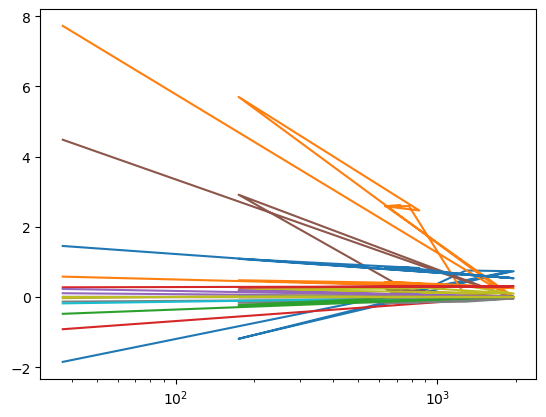

In [46]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

In [47]:
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,100)*5  # 0 ile 1000 arasında 10 adet rastgele alfa değeri oluşturuluyor

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

C:\Users\qasem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.691e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\qasem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.244e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\qasem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e+04, toleranc

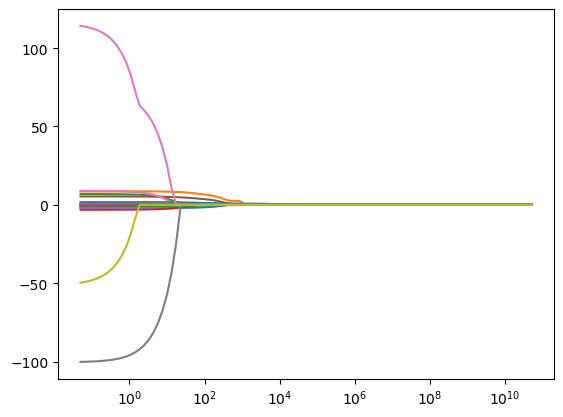

In [48]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

**Tahmin**

In [49]:
lasso_model

Lasso()

In [50]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [51]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [52]:
y_pred = lasso_model.predict(X_test)

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.09758845540347

In [54]:
r2_score(y_test, y_pred)

0.41422798132366134